# Análisis de conjunto de datos

En este notebook se analiza el conjunto de datos *osteoporosis.csv*.


In [3]:
# carga de librerías
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

## Carga de archivos

### Cargar los datos desde el archivo CSV

#### Carga en local

In [ ]:
import pandas as pd
# Carga generica en entorno local PC
datos = pd.read_csv("ruta_del_archivo/osteoporosis.csv")

Pueden cargarse archivos durante la sesión del notebook en Colab pero cuando finalice deberán cargarse de nuevo.
Para proyectos largos **no es recomendable**.

In [ ]:
import pandas as pd
# Carga generica en entorno local Colab
datos = pd.read_csv("/content/osteoporosis.csv", delimiter='\t')
## OBS: carga IMC como char

Muy importante conocer la estructura del archivo. Aunque los **CSV** son archivos de **Valores Separados por Comas**, es común utilizar otro caracter distinto a la *coma* (,) para separar valores como:


*   Punto y coma (;)
*   Espacio en blanco(" ")
*   Tabulador (\t)
*   Barra vertical (|)
*   Slash (/)
*   Backslash (\)




#### Cargar desde Drive

Cargar desde Google Drive requiere una autorización por medio de la cuenta de Google/Gmail del usuario.

In [ ]:
import pandas as pd
# Indicamos que este archivo tiene cabecera (header)
# Usamos como separador el tabulador
# En Google Colab al usar R a veces no está disponible
datos = pd.read_csv("/content/drive/MyDrive/docs_unis_clases/BSG_Institute_clases/Estadística y Probabilidad R/datasets/osteoporosis.csv", header=True, delimiter='\t')

#### Cargar archivo desde la web

In [2]:
import pandas as pd
# Para archivos de repositorios como github utilizar el enlace RAW
datos = pd.read_csv("https://raw.githubusercontent.com/sumegor/courses/refs/heads/main/datasets/osteoporosis.csv", delimiter='\t', decimal=',')
## OBS carga IMC como double

In [ ]:
import pandas as pd
# El enlace web permite lectura pero insertar tags de HTML que no necesitamos
## NO DEBE USARSE PARA CARGAR DATOS!
datos_web =pd.read_csv("https://github.com/sumegor/courses/blob/main/datasets/osteoporosis.csv" )

In [ ]:
#head(datos_web)
#str(datos_web)

## Parte 1

Ver las primeras filas y la estructura del archivo para asegurarnos de que la variable "menarqui" está presente

In [ ]:
datos.head()
#str(datos)

,registro,area,f_nac,edad,grupedad,peso,talla,imc,bua,clasific,menarqui,edad_men,menop,tipo_men,nivel_ed
0,3,10,11659420800,57,55 - 59,70.0,168.0,24.80,69,OSTEOPENIA,12,99,NO,NO MENOPAUSIA/NO CONSTA,SECUNDARIOS
1,4,10,11671689600,46,45 - 49,53.0,152.0,22.94,73,OSTEOPENIA,13,99,NO,NO MENOPAUSIA/NO CONSTA,SECUNDARIOS
2,10,10,11721024000,45,45 - 49,64.0,158.0,25.64,81,NORMAL,14,99,NO,NO MENOPAUSIA/NO CONSTA,PRIMARIOS
3,11,10,11464416000,53,50 - 54,78.0,161.0,30.09,58,OSTEOPENIA,10,50,SI,NATURAL,PRIMARIOS
4,12,10,11690784000,46,45 - 49,56.0,157.0,22.72,89,NORMAL,13,99,NO,NO MENOPAUSIA/NO CONSTA,PRIMARIOS


`describe() `ofrece un resumen estadístico descriptivo de un conjunto de datos numéricos en Pandas (Series o DataFrame).

* Entrada: Una Serie o DataFrame de Pandas con datos numéricos.
* Salida: Un resumen estadístico que incluye: conteo, media, desviación estándar, mínimo, cuartiles (25%, 50%, 75%) y máximo.
* Librería: Pandas (pd.Series.describe, pd.DataFrame.describe).


In [ ]:
datos.describe()

,registro,area,edad,peso,talla,imc,bua,menarqui,edad_men
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,529.890000,11.578000,53.421000,69.122800,156.932300,28.107760,73.297000,12.707000,63.042000
std,292.299937,1.333302,6.792636,11.643733,6.093582,4.717925,16.809323,1.552921,24.176284
min,3.000000,10.000000,45.000000,44.000000,138.000000,17.210000,11.000000,8.000000,24.000000
25%,280.750000,10.000000,48.000000,60.500000,153.000000,24.797500,62.000000,12.000000,46.000000
50%,531.500000,11.000000,52.000000,68.000000,157.000000,27.510000,72.000000,13.000000,51.000000
75%,781.250000,13.000000,58.000000,75.000000,161.000000,30.820000,84.000000,14.000000,99.000000
max,1033.000000,13.000000,69.000000,123.500000,180.000000,48.390000,136.000000,17.000000,99.000000


Filtrar solo la variable "menarqui"

In [ ]:
menarqui = datos["menarqui"]

### 1. Tipo de la variable

In [ ]:
#Tipo de la variable: menarqui
type(menarqui)

pandas.core.series.Series

**Serie de Pandas**

Es una estructura de datos *unidimensional* (como una columna en una tabla) que puede almacenar datos de cualquier tipo (números, texto, fechas, etc.).

---
```
data = [1, 2, 3, 4, 5]
serie = pd.Series(data)
```
---






### 2. Número de valores diferentes

In [ ]:
valores_diferentes = len(np.unique(menarqui))
print("Número de valores diferentes:", str(valores_diferentes), "\n")


Número de valores diferentes: 10 



3. Calcular el recorrido (rango)

In [ ]:
recorrido = np.ptp(menarqui)

print("Recorrido de 'menarqui':", str(recorrido), "\n")

Recorrido de 'menarqui': 9 



### 4. Media, mediana, cuartiles primero y tercero

In [ ]:
media = np.mean(menarqui)
mediana = np.median(menarqui)
cuartil3 = menarqui.quantile( 0.75)
cuartil1 = menarqui.quantile( 0.25)
print("Media:", media, "\n")
print("Mediana:", mediana, "\n")
print("Cuartil 1:", cuartil1, "\n")
print("Cuartil 3:", cuartil3, "\n")

Media: 12.707 

Mediana: 13.0 

Cuartil 1: 12.0 

Cuartil 3: 14.0 



### 5. Representar la variable en un boxplot

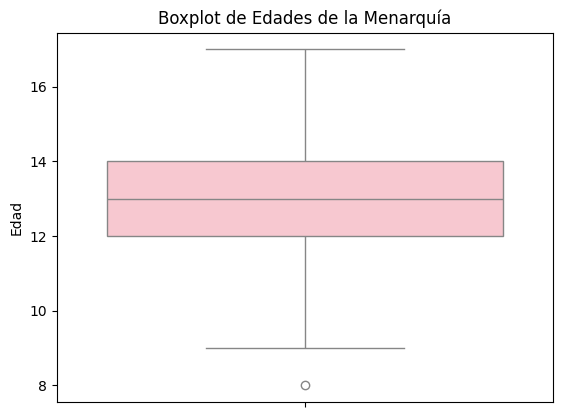

In [ ]:
# Crear el boxplot
sns.boxplot(y=menarqui, color="pink")

# Personalizar el gráfico (opcional)
plt.title("Boxplot de Edades de la Menarquía")
plt.ylabel("Edad")

# Mostrar el gráfico
plt.show()

In [ ]:
# Funcion para hallar outliers por medio del rango intercuartilico
def outliers_iqr_np(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr_val = q3 - q1
    limite_superior  = q3 + 1.5 * iqr_val
    limite_inferior  = q1 - 1.5 * iqr_val
    outliers = data[(data < limite_inferior ) | (data > limite_superior )]
    return outliers


In [ ]:
valores_atipicos=outliers_iqr_np(menarqui)
print(valores_atipicos)

798    8
Name: menarqui, dtype: int64


In [ ]:
len(valores_atipicos)

1

### 6. Tablas de frecuencias

| Tipo de frecuencia | Descripción | Fórmula en LaTeX | Fórmula en Python |
|---|---|---|---|
| Frecuencia absoluta (ni) | Número de veces que se repite un valor (xi) en un conjunto de datos. |  $n_i = \sum_{j=1}^{N} I(x_j = x_i)$ | `df['columna'].value_counts()[valor]` |
| Frecuencia relativa (fi) | Proporción de veces que se repite un valor (xi) con respecto al total de datos (N). | $f_i = \frac{n_i}{N}$ | `df['columna'].value_counts(normalize=True)[valor]` |
| Frecuencia acumulada (Ni) | Suma de las frecuencias absolutas de todos los valores hasta (xi) inclusive. | $N_i = \sum_{k=1}^{i} n_k$ | `df['columna'].value_counts().sort_index().cumsum()[valor]` |
| Frecuencia relativa acumulada (Fi) | Proporción de datos que son menores o iguales a un valor (xi) con respecto al total de datos (N). | $F_i = \frac{N_i}{N} = \sum_{k=1}^{i} f_k$ | `df['columna'].value_counts(normalize=True).sort_index().cumsum()[valor]` |

In [ ]:
# Cantidad de registros
len(menarqui)

1000

#### Cálculos de frecuencias utilizando ciclos

In [ ]:
# funcion value_counts() cuenta la cantidad de valores de cada elemento de una columna de una Serie
from collections import Counter

total_datos= len(menarqui) # cantidad de registros totales

frecuencia_abs=Counter(menarqui) # igual a menarqui.value_counts(sort=False).sort_index()

frecuencia_rel = {num: frecuencia / total_datos for num, frecuencia in frecuencia_abs.items()}

# Necesito ciclos para los calculos acumulados!!
frecuencia_acum = []
frecuencia_relativa_acum= []
acumulado = 0
acumulado_rel = 0
for index, frec in frecuencia_abs.items():
    # F. acumulada
    acumulado += frec # igual a---> acumulado = acumulado + frec
    frecuencia_acum.append(acumulado)
    # F. relativa
    acumulado_rel+= frecuencia_rel[index] # igual a---> acumulado_rel = acumulado_rel + frecuencia_rel[index]
    frecuencia_relativa_acum.append(acumulado_rel)

## Los resultados de las frecuencias:
print("Frecuencia absoluta:\n"+str(frecuencia_abs))
print("Frecuencia relativa:\n"+str(frecuencia_rel))
print("Frecuencia acumulada:\n"+ str(frecuencia_acum))
print("Frecuencia relativa acumulada:\n"+ str(frecuencia_relativa_acum))

Frecuencia absoluta:
Counter({13: 241, 12: 214, 14: 211, 11: 159, 15: 65, 10: 56, 16: 29, 9: 14, 17: 10, 8: 1})
Frecuencia relativa:
{12: 0.214, 13: 0.241, 14: 0.211, 10: 0.056, 11: 0.159, 15: 0.065, 9: 0.014, 16: 0.029, 17: 0.01, 8: 0.001}
Frecuencia acumulada:
[214, 455, 666, 722, 881, 946, 960, 989, 999, 1000]
Frecuencia relativa acumulada:
[0.214, 0.45499999999999996, 0.6659999999999999, 0.722, 0.881, 0.946, 0.96, 0.989, 0.999, 1.0]


#### Cálculos de frecuencias SIN ciclos directos

Aquí solo usamos funciones de la librería **pandas** de python.



In [ ]:
import pandas as pd # Si es la primera vez que usamos esta librería

# Calcular la frecuencia absoluta
frecuencia_absoluta = datos["menarqui"].value_counts()

# Calcular la frecuencia relativa
frecuencia_relativa = datos["menarqui"].value_counts(normalize=True)

# Calcular la frecuencia acumulada
frecuencia_acumulada = datos["menarqui"].value_counts().sort_index().cumsum()

# Calcular la frecuencia relativa acumulada
frecuencia_relativa_acumulada = datos["menarqui"].value_counts(normalize=True).sort_index().cumsum()

print("Frecuencia absoluta:\n"+str(frecuencia_absoluta))
print("Frecuencia relativa:\n"+str(frecuencia_relativa))
print("Frecuencia acumulada:\n"+ str(frecuencia_acumulada))
print("Frecuencia relativa acumulada:\n"+ str(frecuencia_relativa_acumulada))

Frecuencia absoluta:
menarqui
13    241
12    214
14    211
11    159
15     65
10     56
16     29
9      14
17     10
8       1
Name: count, dtype: int64
Frecuencia relativa:
menarqui
13    0.241
12    0.214
14    0.211
11    0.159
15    0.065
10    0.056
16    0.029
9     0.014
17    0.010
8     0.001
Name: proportion, dtype: float64
Frecuencia acumulada:
menarqui
8        1
9       15
10      71
11     230
12     444
13     685
14     896
15     961
16     990
17    1000
Name: count, dtype: int64
Frecuencia relativa acumulada:
menarqui
8     0.001
9     0.015
10    0.071
11    0.230
12    0.444
13    0.685
14    0.896
15    0.961
16    0.990
17    1.000
Name: proportion, dtype: float64


### 7. Rango o recorrido intercuartílico

El recorrido intercuartílico es *la diferencia entre el primer y el tercer cuartil* de un conjunto de datos. Se utiliza para cuantificar la dispersión de los datos centrales de una distribución.

In [ ]:
# Rango intercuartílico
# Se calculan los cuartiles 3 y 1 (percentil 75 y 25) utilizando la función quantile() y se resta el cuartil 25% al cuartil 75%
q75 = datos["menarqui"].quantile(0.75)
q25 = datos["menarqui"].quantile(0.25)
rango_intercuartilico = q75 - q25

print(f"Rango Intercuartílico: {rango_intercuartilico}")

Rango Intercuartílico: 2.0


### 8. Representar las frecuencias absolutas en un gráfico

Text(0, 0.5, 'Frecuencia')

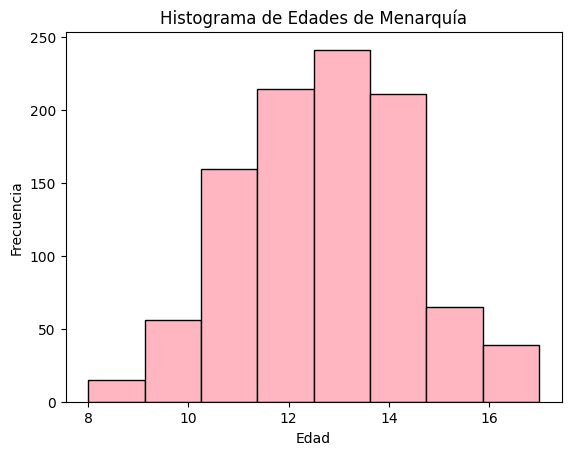

In [ ]:
# Crear el histograma
plt.hist(datos["menarqui"], bins=8, color='lightpink', edgecolor='black', histtype="bar") # tipos stepfilled, step, bar

# Personalizar el gráfico (opcional)
plt.title('Histograma de Edades de Menarquía')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

## Parte 2

In [ ]:
import pandas as pd
# Cargar los datos SOLO SI ES NECESARIO O HAN HABIDO GRANDES CAMBIOS EN LA PARTE ANTERIOR
#datos = pd.pd.read_csv("ruta_del_archivo/osteoporosis.csv")

Verificar las primeras filas y la estructura del archivo

In [ ]:
datos.head()

,registro,area,f_nac,edad,grupedad,peso,talla,imc,bua,clasific,menarqui,edad_men,menop,tipo_men,nivel_ed
0,3,10,11659420800,57,55 - 59,70.0,168.0,24.80,69,OSTEOPENIA,12,99,NO,NO MENOPAUSIA/NO CONSTA,SECUNDARIOS
1,4,10,11671689600,46,45 - 49,53.0,152.0,22.94,73,OSTEOPENIA,13,99,NO,NO MENOPAUSIA/NO CONSTA,SECUNDARIOS
2,10,10,11721024000,45,45 - 49,64.0,158.0,25.64,81,NORMAL,14,99,NO,NO MENOPAUSIA/NO CONSTA,PRIMARIOS
3,11,10,11464416000,53,50 - 54,78.0,161.0,30.09,58,OSTEOPENIA,10,50,SI,NATURAL,PRIMARIOS
4,12,10,11690784000,46,45 - 49,56.0,157.0,22.72,89,NORMAL,13,99,NO,NO MENOPAUSIA/NO CONSTA,PRIMARIOS


Filtrar la variable "imc" para llamarla de esta manera en el resto del notebook.

In [ ]:
imc = datos["imc"]

 ### 1. Tipo de la variable

In [ ]:
type(imc)

pandas.core.series.Series

#### NOTA sobre conversión de variables

Si la varible **NO ES NUMÉRICA...**
pero está representando un valor CUANTITATIVO debemos hacer el cambio a un tipo de datos numérico como entero o double.



### 2. Número de valores distintos

La función `unique` identifica los **valores únicos** en un array o serie de Pandas.


* **Entrada**: Un array o Serie de Pandas.
* **Salida**: Un nuevo array con los valores únicos, sin repeticiones, ordenados.


In [ ]:
len(imc.unique())

643

### 3. Mediana, cuartiles

In [ ]:
media_imc = np.mean(imc)
mediana_imc = np.median(imc)
cuartil3_imc = imc.quantile( 0.75)
cuartil1_imc = imc.quantile( 0.25)
print("Media:", media_imc, "\n")
print("Mediana:", mediana_imc, "\n")
print("Cuartil 1:", cuartil1_imc, "\n")
print("Cuartil 3:", cuartil3_imc, "\n")

Media: 28.107760000000003 

Mediana: 27.51 

Cuartil 1: 24.7975 

Cuartil 3: 30.82 



### 4. Recorrido / Rango

In [ ]:
# Rango intercuartílico
# Se calculan los cuartiles 3 y 1 (percentil 75 y 25) utilizando la función quantile() y se resta el cuartil 25% al cuartil 75%
q75_imc = datos["imc"].quantile(0.75)
q25_imc = datos["imc"].quantile(0.25)
rango_intercuartilico_imc = q75_imc - q25_imc

print(f"Rango Intercuartílico (IQR): {rango_intercuartilico_imc}")

Rango Intercuartílico: 6.022500000000001


In [ ]:
print(f"Mínimo: {datos['imc'].min()}")
print(f"Máximo: {datos['imc'].max()}")

Mínimo: 17.21
Máximo: 48.39
Media: 28.107760000000003


### 5. Desviación típica muestral

In [ ]:
desviacion_tipica_imc = imc.std()
print(f"Desviación estándar: {desviacion_tipica_imc}")

Desviación estándar: 4.717925052308398


#### **Tabla IMC**

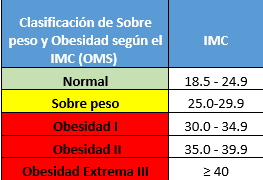

Cómo está la población de este conjunto de datos según la tabla del IMC? 🤔


### 6. Representación mediante boxplot y valores atípicos

#### Sobre los gráficos Boxplot (diagrama de caja)

Representa datos numéricos en forma de *cuartiles*. Se utiliza en estadística para mostrar la forma de una *distribución de datos*.

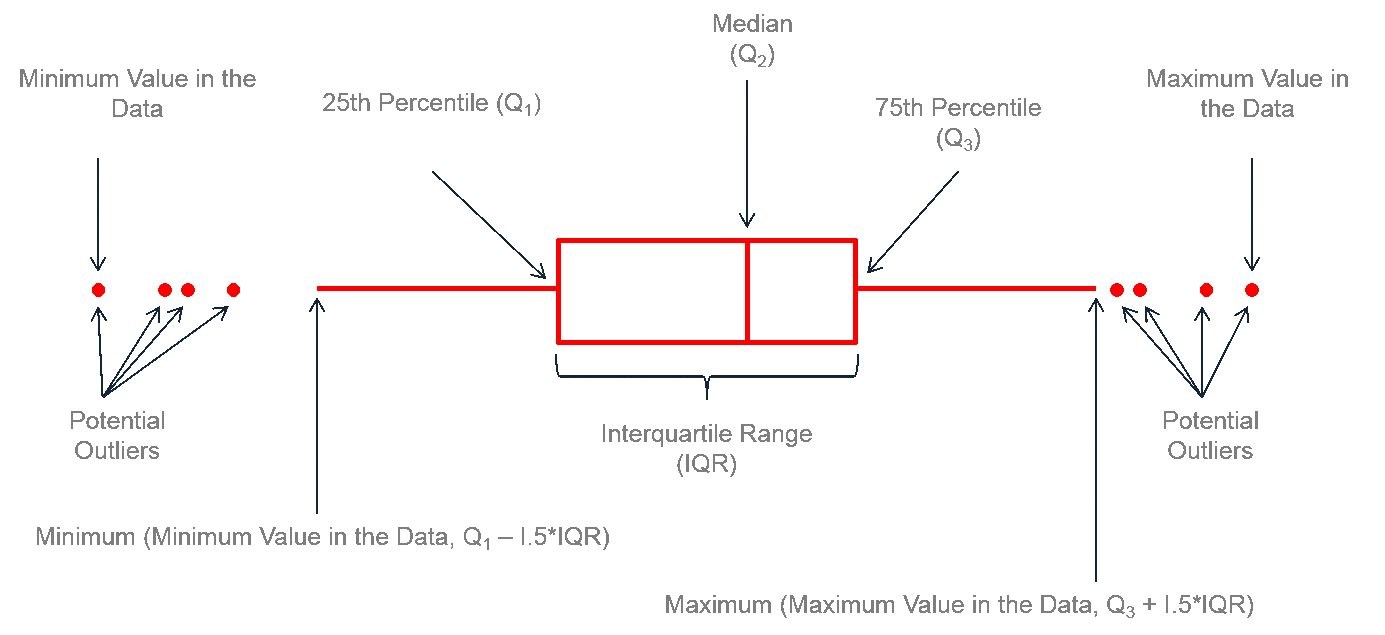

Fuente: [R Graph Gallery](https://r-graph-gallery.com/boxplot.html)

In [ ]:
## LISTADO DE COLORES
import matplotlib.colors as mcolors

print(mcolors.TABLEAU_COLORS) #o BASE_COLORS, CSS4_COLORS
#To see the output, run the code.

{'tab:blue': '#1f77b4', 'tab:orange': '#ff7f0e', 'tab:green': '#2ca02c', 'tab:red': '#d62728', 'tab:purple': '#9467bd', 'tab:brown': '#8c564b', 'tab:pink': '#e377c2', 'tab:gray': '#7f7f7f', 'tab:olive': '#bcbd22', 'tab:cyan': '#17becf'}


In [ ]:
# Colores por nombre
xkcd_colors = list(mcolors.cnames.keys())
for color in xkcd_colors:
     #if color.startswith('xkcd:'):
       print(color)

aliceblue
antiquewhite
aqua
aquamarine
azure
beige
bisque
black
blanchedalmond
blue
blueviolet
brown
burlywood
cadetblue
chartreuse
chocolate
coral
cornflowerblue
cornsilk
crimson
cyan
darkblue
darkcyan
darkgoldenrod
darkgray
darkgreen
darkgrey
darkkhaki
darkmagenta
darkolivegreen
darkorange
darkorchid
darkred
darksalmon
darkseagreen
darkslateblue
darkslategray
darkslategrey
darkturquoise
darkviolet
deeppink
deepskyblue
dimgray
dimgrey
dodgerblue
firebrick
floralwhite
forestgreen
fuchsia
gainsboro
ghostwhite
gold
goldenrod
gray
green
greenyellow
grey
honeydew
hotpink
indianred
indigo
ivory
khaki
lavender
lavenderblush
lawngreen
lemonchiffon
lightblue
lightcoral
lightcyan
lightgoldenrodyellow
lightgray
lightgreen
lightgrey
lightpink
lightsalmon
lightseagreen
lightskyblue
lightslategray
lightslategrey
lightsteelblue
lightyellow
lime
limegreen
linen
magenta
maroon
mediumaquamarine
mediumblue
mediumorchid
mediumpurple
mediumseagreen
mediumslateblue
mediumspringgreen
mediumturquoise
mediumv

Creando un boxplot con seaborn para los valores de IMC:



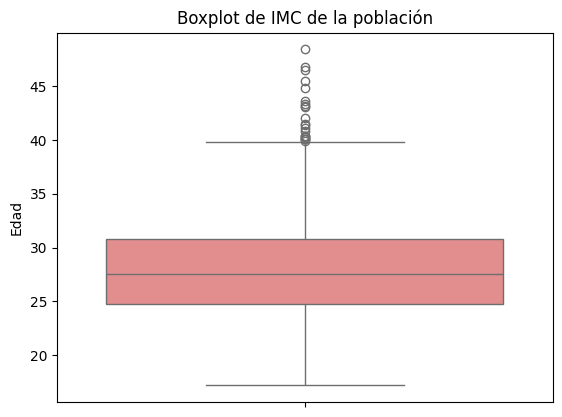

In [ ]:
# Crear el boxplot
sns.boxplot(y=imc, color="lightcoral")

# Personalizar el gráfico (opcional)
plt.title("Boxplot de IMC de la población")
plt.ylabel("Edad")

# Mostrar el gráfico
plt.show()

### 7. Comparar IMC según menopausia

Text(0, 0.5, 'IMC')

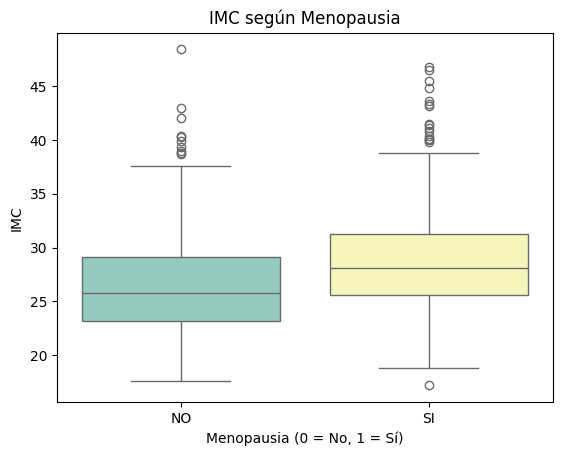

In [ ]:
sns.boxplot(x=datos["menop"], y=imc, data=datos, hue=datos["menop"], palette='Set3')

# Personalizar el gráfico (opcional)
plt.title('IMC según Menopausia')
plt.xlabel('Menopausia (0 = No, 1 = Sí)')
plt.ylabel('IMC')

### 8. Tabla de frecuencias absolutas

In [ ]:
# Calcular la frecuencia absoluta
frecuencia_absoluta_imc = imc.value_counts()
print("Frecuencia absoluta:\n"+str(frecuencia_absoluta))

Frecuencia absoluta:
imc
25.97    7
25.63    6
27.34    6
22.06    5
25.59    5
        ..
33.89    1
31.82    1
38.82    1
35.50    1
34.63    1
Name: count, Length: 643, dtype: int64


### 9. Agrupar en cinco clases de igual longitud

In [ ]:
clases_imc = pd.cut(imc, bins = 5)
print(clases_imc)

0      (23.446, 29.682]
1      (17.179, 23.446]
2      (23.446, 29.682]
3      (29.682, 35.918]
4      (17.179, 23.446]
             ...       
995    (23.446, 29.682]
996    (23.446, 29.682]
997    (29.682, 35.918]
998    (29.682, 35.918]
999    (23.446, 29.682]
Name: imc, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(17.179, 23.446] < (23.446, 29.682] < (29.682, 35.918] <
                                           (35.918, 42.154] < (42.154, 48.39]]


In [ ]:
type(clases_imc)

pandas.core.series.Series

### 10. Representar las clases mediante un histograma

Text(0.5, 1.0, 'Histograma de IMC')

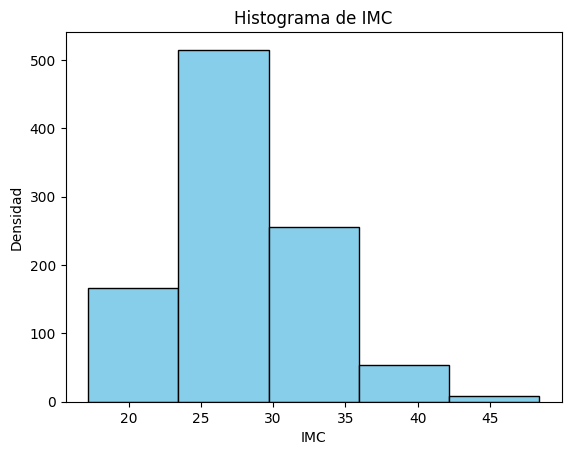

In [ ]:
# Crear el histograma
plt.hist(datos["imc"], bins=5, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('IMC')
plt.ylabel('Densidad')
plt.title('Histograma de IMC')

Calcular el porcentaje de datos en cada clase

In [ ]:
# Contar la frecuencia de cada intervalo
frecuencia_grupos_imc = clases_imc.value_counts()

# Calcular el porcentaje
porcentaje_grupos_imc = (frecuencia_grupos_imc / len(imc)) * 100

# Mostrar los resultados
print("Frecuencia de cada intervalo:\n", frecuencia_grupos_imc)
print("\nPorcentaje de datos en cada intervalo:\n", porcentaje_grupos_imc)

Frecuencia de cada intervalo:
 imc
(23.446, 29.682]    515
(29.682, 35.918]    255
(17.179, 23.446]    167
(35.918, 42.154]     54
(42.154, 48.39]       9
Name: count, dtype: int64

Porcentaje de datos en cada intervalo:
 imc
(23.446, 29.682]    51.5
(29.682, 35.918]    25.5
(17.179, 23.446]    16.7
(35.918, 42.154]     5.4
(42.154, 48.39]      0.9
Name: count, dtype: float64


### 11. Valores entre los que se mueve el 80% central de la muestra

In [ ]:
# Calcular los percentiles 10 y 90
percentil_10_imc = imc.quantile(0.10)
percentil_90_imc = imc.quantile(0.90)

# Seleccionar / filtrar los datos dentro del 80% central
datos_centrales_80 = datos[(datos['imc'] >= percentil_10_imc) & (datos['imc'] <= percentil_90_imc)]

# Mostrar los resultados
print("Percentil 10:", percentil_10_imc)
print("Percentil 90:", percentil_90_imc)
print("\nDatos centrales:\n", datos_centrales_80)

Percentil 10: 22.476
Percentil 90: 34.48

Datos centrales:
      registro  area        f_nac  edad grupedad  peso  talla    imc  bua  \
0           3    10  11659420800    57  55 - 59  70.0  168.0  24.80   69   
1           4    10  11671689600    46  45 - 49  53.0  152.0  22.94   73   
2          10    10  11721024000    45  45 - 49  64.0  158.0  25.64   81   
3          11    10  11464416000    53  50 - 54  78.0  161.0  30.09   58   
4          12    10  11690784000    46  45 - 49  56.0  157.0  22.72   89   
..        ...   ...          ...   ...      ...   ...    ...    ...  ...   
994      1028    11  11190182400    63  60 - 64  71.0  161.0  27.39   57   
995      1029    11  11287036800    60  60 - 64  64.0  158.0  25.64   69   
996      1030    11  11066371200    67  65 - 69  68.0  157.0  27.59   75   
997      1031    11  11289196800    59  55 - 59  72.0  153.0  30.76   67   
999      1033    11  11213164800    62  60 - 64  67.0  161.0  25.85   65   

       clasific  menarqui  

### 12. Dibujo del diagrama de densidad

Un **diagrama de densidad** en `Seaborn`, también conocido como gráfico de *densidad del núcleo* (KDE), es una excelente manera de visualizar la ***distribución de una variable numérica***.


A diferencia de un histograma, que muestra la frecuencia de los datos en barras, un diagrama de densidad utiliza una **curva** suave para estimar la *función de densidad de probabilidad* subyacente.

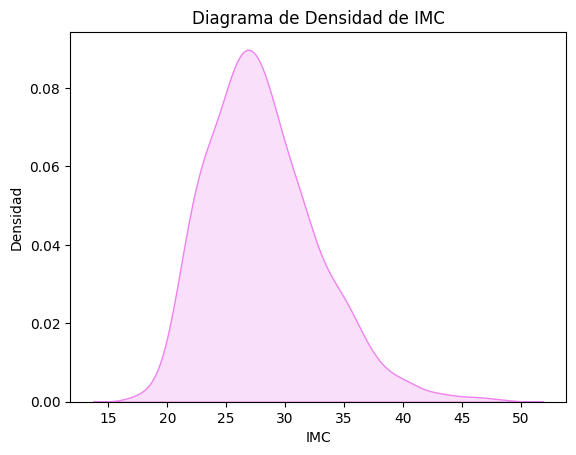

In [ ]:
# Crear el diagrama de densidad
sns.kdeplot(imc,fill=True, color="violet")

# Personalizar el gráfico (opcional)
plt.title("Diagrama de Densidad de IMC")
plt.xlabel("IMC")
plt.ylabel("Densidad")

# Mostrar el gráfico
plt.show()

## Parte 3

Filtrar la variable "tipo_men"

In [ ]:
tipo_men = datos["tipo_men"]

### 1. Tipo de variable:

Identificamos si es numérica, categórica o de otro tipo.

In [ ]:
# 1. Tipo de la variable
type(tipo_men)

pandas.core.series.Series

### 2. Número / cantidad de valores distintos

In [ ]:
tipo_men.unique()

array(['NO MENOPAUSIA/NO CONSTA', 'NATURAL', 'AMBAS', 'OVARIECTOMIA',
       'HISTERECTOMIA'], dtype=object)

### 3. Tablas de frecuencias absolutas y relativas
frecuencias absolutas y relativas:

`value_counts()`




In [ ]:
# Calcular la frecuencia absoluta
frecuencia_absoluta_tm = datos["tipo_men"].value_counts()

# Calcular la frecuencia relativa
frecuencia_relativa_tm = datos["tipo_men"].value_counts(normalize=True)

print("Frecuencia absoluta:\n"+str(frecuencia_absoluta_tm))
print("Frecuencia relativa:\n"+str(frecuencia_relativa_tm))

Frecuencia absoluta:
tipo_men
NATURAL                    544
NO MENOPAUSIA/NO CONSTA    303
AMBAS                       79
HISTERECTOMIA               63
OVARIECTOMIA                11
Name: count, dtype: int64
Frecuencia relativa:
tipo_men
NATURAL                    0.544
NO MENOPAUSIA/NO CONSTA    0.303
AMBAS                      0.079
HISTERECTOMIA              0.063
OVARIECTOMIA               0.011
Name: proportion, dtype: float64



### 4. Tablas de frecuencias acumuladas

**Tablas acumuladas**: Solo tienen sentido para variables *ordinales*, las cuales tienen un orden lógico (por ejemplo, "bajo", "medio", "alto").

Usaremos `dtype` para conocer el tipo de la variable que estamos analizando.

`isinstance(objeto, tipo)` es una función incorporada de Python que verifica si un objeto es una instancia de un tipo específico.

En conjunto podremos saber si la variable analizada es una *variable categórica* en **Pandas**.

In [ ]:
#es_ordinal = pd.api.types.is_categorical_dtype(tipo_men) and tipo_men.cat.ordered
es_ordinal = isinstance(tipo_men.dtype, pd.CategoricalDtype) and tipo_men.cat.ordered
print(f"¿Tiene sentido calcular tablas de frecuencias acumuladas? {es_ordinal}\n")

if es_ordinal:
    frecuencia_absoluta_tm = tipo_men.value_counts().sort_index()
    frecuencia_relativa_tm = tipo_men.value_counts(normalize=True).sort_index()

    frecuencia_acumulada_tm = frecuencia_absoluta_tm.cumsum()
    frecuencia_relativa_acumulada_tm = frecuencia_relativa_tm.cumsum()

    print("Tabla de frecuencias acumuladas:\n")
    print(frecuencia_acumulada_tm)

    print("\nTabla de frecuencias relativas acumuladas:\n")
    print(frecuencia_relativa_acumulada_tm)

¿Tiene sentido calcular tablas de frecuencias acumuladas? False



5. Medidas de centralización

Para variables categóricas, se usa la **moda** como medida de centralización.

In [ ]:
# Calcular la moda
moda_tm = datos['tipo_men'].mode()

# Mostrar los resultados
print("Moda:\n", moda_tm)

Moda:
 0    NATURAL
Name: tipo_men, dtype: object


6. Representación de las frecuencias absolutas

Usamos un diagrama de barras (barplot()) para representar las frecuencias absolutas.

<ipython-input-91-6a0ac90a7fa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_absoluta_tm.index.tolist(), y=frecuencia_absoluta_tm, palette='tab10')


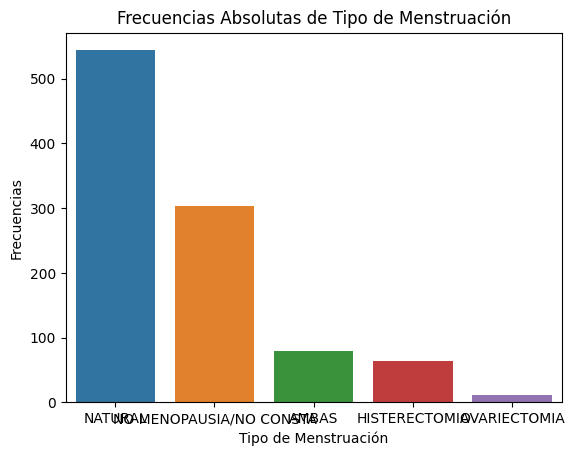

In [ ]:
# Crear el diagrama de barras
# agregar hue para eliminar el aviso de deprecated!
sns.barplot(x=frecuencia_absoluta_tm.index.tolist(), y=frecuencia_absoluta_tm, palette='tab10')

# Personalizar el gráfico (opcional)
plt.title("Frecuencias Absolutas de Tipo de Menstruación")
plt.xlabel("Tipo de Menstruación")
plt.ylabel("Frecuencias")
#plt.xticks(rotation=45)  # Rotar las etiquetas 45 grados

# Mostrar el gráfico
plt.show()

Personalización de paletas en *Seaborn*: ["Cómo elegir paletas de colores" ](https://seaborn.pydata.org/tutorial/color_palettes.html)

## Parte 4

AQUI

Filtrar la variable "nivel_ed"

In [4]:
nivel_ed = datos["nivel_ed"]

### 1. Tipo de la variable

In [12]:
datos["nivel_ed"].dtype

dtype('O')

dtype('O') significa objeto.

Se utiliza para almacenar cadenas de texto (`strings`), pero también puede contener datos de **tipos mixtos**.



In [6]:
nivel_ed.head()

,nivel_ed
0,SECUNDARIOS
1,SECUNDARIOS
2,PRIMARIOS
3,PRIMARIOS
4,PRIMARIOS


###  2. Valores distintos

In [8]:
valores_distintos_nivel_ed = nivel_ed.unique()
valores_distintos_nivel_ed

array(['SECUNDARIOS', 'PRIMARIOS', 'SIN ESTUDIOS',
       'PRIMARIOS SIN FINALIZAR', 'SUPERIORES'], dtype=object)

In [15]:
num_val_dist_nivel_ed=len(valores_distintos_nivel_ed)
print("Hay "+str(num_val_dist_nivel_ed) +" valores distintos para esta variable")

Hay 5 valores distintos para esta variable


### 3. Tablas de frecuencias absolutas y relativas

In [16]:
# Calcular la frecuencia absoluta
frecuencia_absoluta_ne = datos["nivel_ed"].value_counts()

# Calcular la frecuencia relativa
frecuencia_relativa_ne = datos["nivel_ed"].value_counts(normalize=True)

print("Frecuencia absoluta:\n"+str(frecuencia_absoluta_ne))
print("Frecuencia relativa:\n"+str(frecuencia_relativa_ne))

Frecuencia absoluta:
nivel_ed
PRIMARIOS                  467
PRIMARIOS SIN FINALIZAR    212
SECUNDARIOS                150
SIN ESTUDIOS               122
SUPERIORES                  49
Name: count, dtype: int64
Frecuencia relativa:
nivel_ed
PRIMARIOS                  0.467
PRIMARIOS SIN FINALIZAR    0.212
SECUNDARIOS                0.150
SIN ESTUDIOS               0.122
SUPERIORES                 0.049
Name: proportion, dtype: float64


### 4. Ordenar los niveles de la variable según el nivel de estudios

Debemos convertir la variable `"nivel_ed"` a `Categorical` y luego sí ordenamos según el nivel de estudios.

Porque si no ordenamos primero, al hacer cálculos acumulados estaríamos sumando niveles de estudio no compatibles y tendríamos sumatorias sin sentido en la vida real.

In [29]:
frecuencia_absoluta_ne

,count
nivel_ed,
PRIMARIOS,467
PRIMARIOS SIN FINALIZAR,212
SECUNDARIOS,150
SIN ESTUDIOS,122
SUPERIORES,49


In [33]:
orden_niveles_estudio=["SIN ESTUDIOS", "PRIMARIOS SIN FINALIZAR","PRIMARIOS", "SECUNDARIOS", "SUPERIORES"]

# Convertir la columna 'nivel_ed' a tipo 'Categorical' con el orden especificado
datos["nivel_ed"] = pd.Categorical(datos['nivel_ed'], categories=orden_niveles_estudio, ordered=True)

# Ordenar el DataFrame por la columna 'categoria'
datos_ordenado_nivel_estudio = datos.sort_values('nivel_ed')

#print(datos_ordenado_nivel_estudio) # muestra TODO el DataFrame
datos_ordenado_nivel_estudio["nivel_ed"].head()

,nivel_ed
88,SIN ESTUDIOS
216,SIN ESTUDIOS
629,SIN ESTUDIOS
217,SIN ESTUDIOS
219,SIN ESTUDIOS


In [28]:
frecuencia_absoluta_ne.dtype

dtype('int64')

In [32]:
# Convertir la serie a tipo 'Categorical' con el orden especificado
frecuencia_absoluta_ne_ordenada = pd.Categorical(frecuencia_absoluta_ne.index, categories=orden_niveles_estudio, ordered=True)

# Ordenar la serie
frecuencia_absoluta_ne_ordenada = frecuencia_absoluta_ne.sort_index()
frecuencia_absoluta_ne_ordenada

,count
nivel_ed,
SIN ESTUDIOS,122
PRIMARIOS SIN FINALIZAR,212
PRIMARIOS,467
SECUNDARIOS,150
SUPERIORES,49


In [34]:
# Convertir la serie a tipo 'Categorical' con el orden especificado
frecuencia_relativa_ne_ordenada = pd.Categorical(frecuencia_relativa_ne.index, categories=orden_niveles_estudio, ordered=True)

# Ordenar la serie
frecuencia_relativa_ne_ordenada = frecuencia_relativa_ne.sort_index()
frecuencia_relativa_ne_ordenada

,proportion
nivel_ed,
SIN ESTUDIOS,0.122
PRIMARIOS SIN FINALIZAR,0.212
PRIMARIOS,0.467
SECUNDARIOS,0.150
SUPERIORES,0.049


Con un DataFrame ordenado por niveles de estudios, podemos hacer el cálculo de frecuencias acumuladas y relativas acumuladas.

In [35]:
# OJO USAMOS LAS FRECUENCIAS ORDENADAS!!
frecuencia_acumulada_ne = frecuencia_absoluta_ne_ordenada.cumsum()
frecuencia_relativa_acumulada_ne = frecuencia_relativa_ne_ordenada.cumsum()

print("Tabla de frecuencias acumuladas:\n")
print(frecuencia_acumulada_ne)

print("\nTabla de frecuencias relativas acumuladas:\n")
print(frecuencia_relativa_acumulada_ne)

Tabla de frecuencias acumuladas:

nivel_ed
SIN ESTUDIOS                122
PRIMARIOS SIN FINALIZAR     334
PRIMARIOS                   801
SECUNDARIOS                 951
SUPERIORES                 1000
Name: count, dtype: int64

Tabla de frecuencias relativas acumuladas:

nivel_ed
SIN ESTUDIOS               0.122
PRIMARIOS SIN FINALIZAR    0.334
PRIMARIOS                  0.801
SECUNDARIOS                0.951
SUPERIORES                 1.000
Name: proportion, dtype: float64


### 5. Medida de centralización

Para variables ordinales, la **mediana** puede usarse como medida de centralización.

In [39]:
datos_ordenado_nivel_estudio['nivel_ed_num']

,nivel_ed_num
88,1
789,1
21,1
839,1
742,1
...,...
552,5
567,5
889,5
166,5


2.0

In [42]:
#datos_ordenado_nivel_estudio=datos_ordenado_nivel_estudio.sort_values('nivel_ed')

# Asignar valores numéricos a las categorías (basado en el orden)
mapeo_numerico = {'SIN ESTUDIOS': 1, 'PRIMARIOS SIN FINALIZAR': 2, 'PRIMARIOS': 3, 'SECUNDARIOS': 4, 'SUPERIORES': 5}
datos_ordenado_nivel_estudio['nivel_ed_num'] = datos_ordenado_nivel_estudio['nivel_ed'].map(mapeo_numerico)

# Calcular la mediana de la columna "numérica"
datos_ordenado_nivel_estudio['nivel_ed_num']=datos_ordenado_nivel_estudio['nivel_ed_num'].cat.codes
mediana_categoria=datos_ordenado_nivel_estudio['nivel_ed_num'].median()

print(mediana_categoria)  # Output: 2.0

2.0


La medida de centralización (mediana) es: PRIMARIOS

### 6. Representación gráfica

Usaremos un **gráfico de barras** para representar las frecuencias absolutas.

<ipython-input-44-5bab869a1fa0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_absoluta_ne.index.tolist(), y=frecuencia_absoluta_ne, palette='tab10')


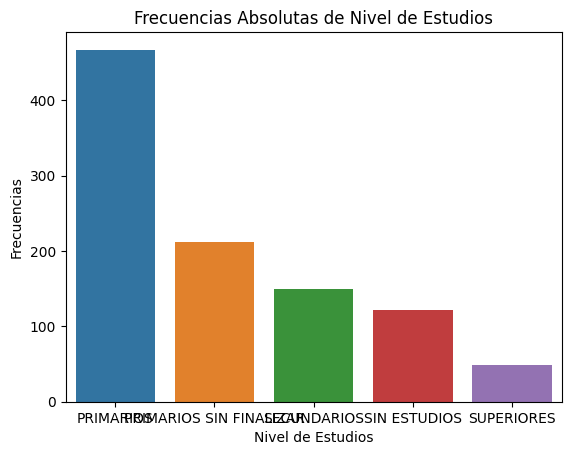

In [44]:
# Crear el diagrama de barras
# agregar hue para eliminar el aviso de deprecated!
sns.barplot(x=frecuencia_absoluta_ne.index.tolist(), y=frecuencia_absoluta_ne, palette='tab10')

# Personalizar el gráfico (opcional)
plt.title("Frecuencias Absolutas de Nivel de Estudios")
plt.xlabel("Nivel de Estudios")
plt.ylabel("Frecuencias")
#plt.xticks(rotation=45)  # Rotar las etiquetas 45 grados

# Mostrar el gráfico
plt.show()